<a href="https://colab.research.google.com/github/vicentcamison/idal_ia3/blob/main/3%20Aprendizaje%20profundo%20(II)/Sesion%204/4_NFLOWS_moons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MOONS

In [ ]:
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

import torch
from torch import nn
from torch import optim

# Para instalar la libreria en el Colab
!pip install nflows

from nflows.flows.base import Flow
from nflows.distributions.normal import StandardNormal
from nflows.transforms.base import CompositeTransform
from nflows.transforms.autoregressive import MaskedAffineAutoregressiveTransform
from nflows.transforms.permutations import ReversePermutation

     |████████████████████████████████| 51kB 2.9MB/s 
  Created wheel for nflows: filename=nflows-0.14-cp36-none-any.whl size=53673 sha256=9f61a2b73780c8b819343c469a32c082eebde52ac261fb3ef41b69894c2d7b4f
  Stored in directory: /root/.cache/pip/wheels/3d/88/9b/87a9884189f450092eb3bbe6a56bb23c17f4788ed3d5d5f7e4
Successfully built nflows


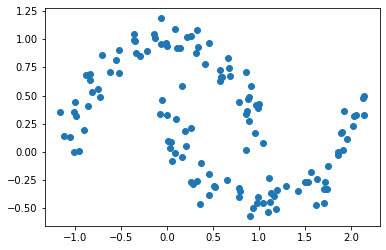

In [ ]:
x, y = datasets.make_moons(128, noise=.1)
plt.scatter(x[:, 0], x[:, 1]);


In [ ]:
num_layers = 5
base_dist = StandardNormal(shape=[2])

transforms = []
for _ in range(num_layers):
    transforms.append(ReversePermutation(features=2))
    transforms.append(MaskedAffineAutoregressiveTransform(features=2, 
                                                          hidden_features=4))
transform = CompositeTransform(transforms)

flow = Flow(transform, base_dist)
optimizer = optim.Adam(flow.parameters())



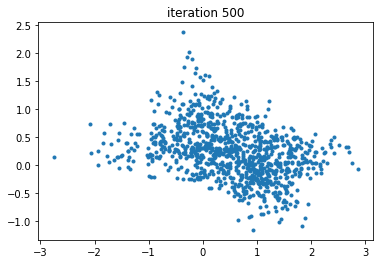

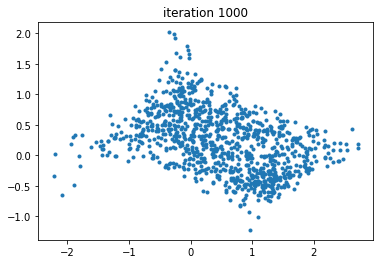

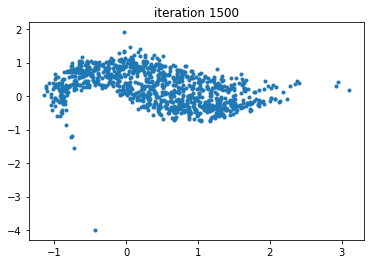

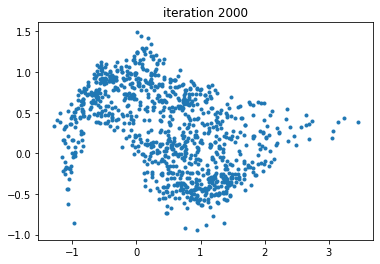

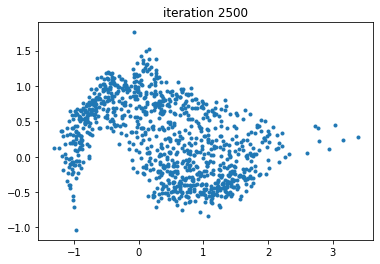

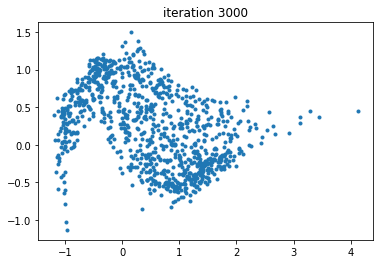

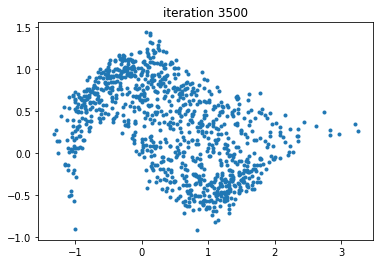

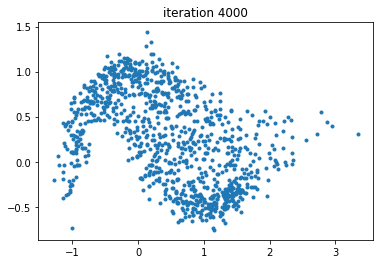

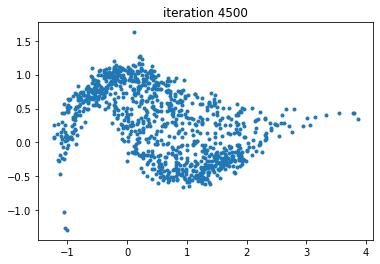

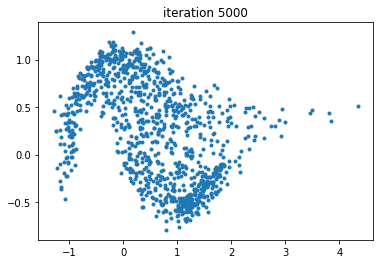

In [ ]:
num_iter = 5000
for i in range(num_iter):
    x, y = datasets.make_moons(128, noise=.1)
    x = torch.tensor(x, dtype=torch.float32)
    optimizer.zero_grad()
    loss = -flow.log_prob(inputs=x).mean()
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 500 == 0:
        #xline = torch.linspace(-1.5, 2.5)
        #yline = torch.linspace(-.75, 1.25)
        #xgrid, ygrid = torch.meshgrid(xline, yline)
        #xyinput = torch.cat([xgrid.reshape(-1, 1), ygrid.reshape(-1, 1)], dim=1)

        #with torch.no_grad():
        #    zgrid = flow.log_prob(xyinput).exp().reshape(100, 100)

        #plt.contourf(xgrid.numpy(), ygrid.numpy(), zgrid.numpy())

        y = flow.sample(1000)
        yy = y.detach().numpy()
        plt.plot(yy[:,0],yy[:,1],'.')
        plt.title('iteration {}'.format(i + 1))
        plt.show()

In [ ]:
num_iter = 50000
for i in range(num_iter):
    x, y = datasets.make_moons(128, noise=.1)
    x = torch.tensor(x, dtype=torch.float32)
    optimizer.zero_grad()
    loss = -flow.log_prob(inputs=x).mean()
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 500 == 0:
        print(i)

499
999
1499
1999
2499
2999
3499
3999
4499
4999
5499
5999
6499
6999
7499
7999
8499
8999
9499
9999
10499
10999
11499
11999
12499
12999
13499
